In [449]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [450]:
df = pa.read_json("https://raw.githubusercontent.com/misode/vanilla-worldgen/master/dimension/overworld.json")

### Filter biomes

In [451]:
biomes = df["generator"]["biome_source"]["biomes"]
dfName = pa.DataFrame([b["biome"] for b in biomes], columns=["biomes"])

params = [b["parameters"] for b in biomes]
parameters = [[p["erosion"], p["depth"], p["weirdness"], p["offset"], p["temperature"], p["humidity"], p["continentalness"]] for p in params]
dfParameters = pa.DataFrame(parameters, columns=["erosion", "depth", "weirdness", "offset", "temperature", "humidity", "continentalness"])

### The dataset

In [452]:
dataset = pa.concat([dfName, dfParameters], axis=1)

In [453]:
dataset

,biomes,erosion,depth,weirdness,offset,temperature,humidity,continentalness
0,minecraft:mushroom_fields,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]","[-1.0, 1.0]","[-1.2, -1.05]"
1,minecraft:mushroom_fields,"[-1.0, 1.0]",1.0,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]","[-1.0, 1.0]","[-1.2, -1.05]"
2,minecraft:deep_frozen_ocean,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]",0.0,"[-1.0, -0.45]","[-1.0, 1.0]","[-1.05, -0.455]"
3,minecraft:deep_frozen_ocean,"[-1.0, 1.0]",1.0,"[-1.0, 1.0]",0.0,"[-1.0, -0.45]","[-1.0, 1.0]","[-1.05, -0.455]"
4,minecraft:frozen_ocean,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]",0.0,"[-1.0, -0.45]","[-1.0, 1.0]","[-0.455, -0.19]"
...,...,...,...,...,...,...,...,...
7573,minecraft:desert,"[0.45, 0.55]",1.0,"[0.9333, 1.0]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[0.03, 1.0]"
7574,minecraft:desert,"[0.55, 1.0]",0.0,"[0.9333, 1.0]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[-0.19, -0.11]"
7575,minecraft:desert,"[0.55, 1.0]",1.0,"[0.9333, 1.0]",0.0,"[0.55, 1.0]","[0.30000000000000004, 1.0]","[-0.19, -0.11]"
7576,minecraft:dripstone_caves,"[-1.0, 1.0]","[0.2, 0.9]","[-1.0, 1.0]",0.0,"[-1.0, 1.0]","[-1.0, 1.0]","[0.8, 1.0]"


### Get biomes list

In [454]:
bName = dataset["biomes"].drop_duplicates()
print(len(bName))
bName

50


0                minecraft:mushroom_fields
2              minecraft:deep_frozen_ocean
4                   minecraft:frozen_ocean
6                minecraft:deep_cold_ocean
8                     minecraft:cold_ocean
10                    minecraft:deep_ocean
12                         minecraft:ocean
14           minecraft:deep_lukewarm_ocean
16                minecraft:lukewarm_ocean
18                    minecraft:warm_ocean
22                   minecraft:stony_shore
24                         minecraft:swamp
26                  minecraft:snowy_slopes
32                  minecraft:snowy_plains
42                   minecraft:snowy_beach
50      minecraft:windswept_gravelly_hills
86                         minecraft:grove
110              minecraft:windswept_hills
122                  minecraft:snowy_taiga
140             minecraft:windswept_forest
152                        minecraft:taiga
178                       minecraft:plains
180                       minecraft:meadow
192        

### Give color to some biome

In [652]:
bName = np.array(["minecraft:savanna", "minecraft:plains", "minecraft:forest", "minecraft:jungle", "minecraft:flower_forest", "minecraft:ocean", "minecraft:warm_ocean", "minecraft:mushroom_fields", "minecraft:desert", "minecraft:swamp", "minecraft:badlands", "minecraft:river", "minecraft:snowy_plains"])
def getBiomeColor(name):
  colors = ['r','lime','forestgreen','darkgreen', 'gray','b','c','m','yellow','goldenrod','orange','pink','k']
  pos = np.where(bName == name)[0]

  if pos.size == 0 or pos[0] >= len(colors):
    return "purple"
  return colors[pos[0]]

In [653]:
def showVec(ds, vecName):
  ds = ds.sort_values("biomes") # sort by biomes

  for i in range(0, len(ds), 1):
    d = ds.iloc[i]
    y = d[vecName] # (min, max)
    color = getBiomeColor(d["biomes"])
    plt.plot((i, i), y, color=color)

In [654]:
nameSelect = ["minecraft:savanna", "minecraft:plains", "minecraft:forest", "minecraft:jungle",
              "minecraft:ocean", "minecraft:warm_ocean", "minecraft:mushroom_fields",
              "minecraft:desert", "minecraft:swamp", "minecraft:snowy_plains", "minecraft:badlands",
              "minecraft:river", "minecraft:flower_forest"]
bNameSelect = [any(b == bn for bn in nameSelect) for b in dataset["biomes"]]


In [655]:
dataset[bNameSelect].sort_values("biomes") # sort by biomes

,biomes,erosion,depth,weirdness,offset,temperature,humidity,continentalness
6198,minecraft:badlands,"[-0.7799, -0.375]",0.0,"[0.5666, 0.7666000000000001]",0.0,"[0.55, 1.0]","[-0.1, 0.1]","[-0.19, 0.03]"
6846,minecraft:badlands,"[-0.375, -0.2225]",0.0,"[0.7666000000000001, 0.9333]",0.0,"[0.55, 1.0]","[-0.1, 0.1]","[0.03, 1.0]"
1265,minecraft:badlands,"[-0.7799, -0.375]",1.0,"[-0.9333, -0.7666000000000001]",0.0,"[0.55, 1.0]","[-1.0, -0.35000000000000003]","[0.03, 1.0]"
1264,minecraft:badlands,"[-0.7799, -0.375]",0.0,"[-0.9333, -0.7666000000000001]",0.0,"[0.55, 1.0]","[-1.0, -0.35000000000000003]","[0.03, 1.0]"
1259,minecraft:badlands,"[-1.0, -0.7799]",1.0,"[-0.9333, -0.7666000000000001]",0.0,"[0.55, 1.0]","[-1.0, -0.35000000000000003]","[-0.11, 0.03]"
...,...,...,...,...,...,...,...,...
2589,minecraft:swamp,"[0.55, 1.0]",1.0,"[-0.4, -0.2666]",0.0,"[-0.45, 1.0]","[-1.0, 1.0]","[-0.11, 1.0]"
21,minecraft:warm_ocean,"[-1.0, 1.0]",1.0,"[-1.0, 1.0]",0.0,"[0.55, 1.0]","[-1.0, 1.0]","[-0.455, -0.19]"
20,minecraft:warm_ocean,"[-1.0, 1.0]",0.0,"[-1.0, 1.0]",0.0,"[0.55, 1.0]","[-1.0, 1.0]","[-0.455, -0.19]"
19,minecraft:warm_ocean,"[-1.0, 1.0]",1.0,"[-1.0, 1.0]",0.0,"[0.55, 1.0]","[-1.0, 1.0]","[-1.05, -0.455]"


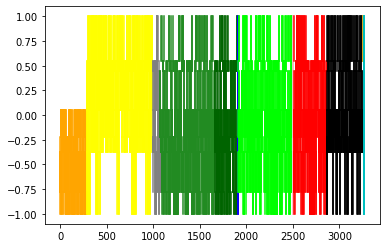

In [656]:
showVec(dataset[bNameSelect], "erosion") # nivelé more high is more flatten

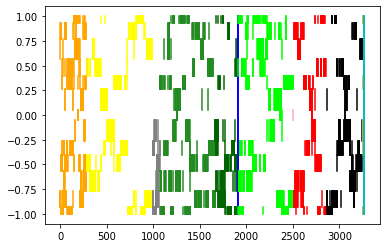

In [657]:
showVec(dataset[bNameSelect], "weirdness") # more high more high altitude ?

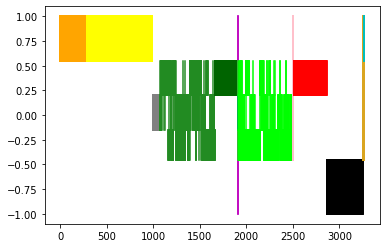

In [658]:
showVec(dataset[bNameSelect], "temperature") # biome grouping

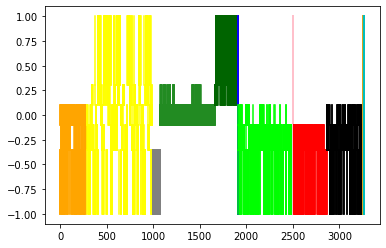

In [659]:
showVec(dataset[bNameSelect], "humidity") # biome grouping 2

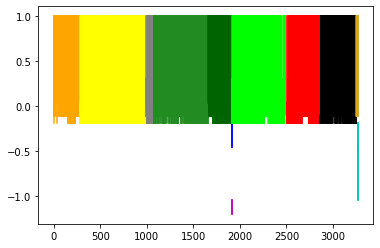

In [660]:
showVec(dataset[bNameSelect], "continentalness")

## Test with desert

In [661]:
desert = dataset[dataset["biomes"] == "minecraft:desert"]
desert

index = []
for i, d in desert.iterrows():
  if d["erosion"][0] == -0.2225 and d["erosion"][1] == 0.45 and d["humidity"][0] == 0.1 and d["humidity"][1] == 0.30000000000000004:
    index.append(i)
index

desert.loc[index]

,biomes,erosion,depth,weirdness,offset,temperature,humidity,continentalness
3782,minecraft:desert,"[-0.2225, 0.45]",0.0,"[-0.2666, -0.05]",0.0,"[0.55, 1.0]","[0.1, 0.30000000000000004]","[-0.19, -0.11]"
3783,minecraft:desert,"[-0.2225, 0.45]",1.0,"[-0.2666, -0.05]",0.0,"[0.55, 1.0]","[0.1, 0.30000000000000004]","[-0.19, -0.11]"
4366,minecraft:desert,"[-0.2225, 0.45]",0.0,"[0.05, 0.2666]",0.0,"[0.55, 1.0]","[0.1, 0.30000000000000004]","[-0.19, -0.11]"
4367,minecraft:desert,"[-0.2225, 0.45]",1.0,"[0.05, 0.2666]",0.0,"[0.55, 1.0]","[0.1, 0.30000000000000004]","[-0.19, -0.11]"


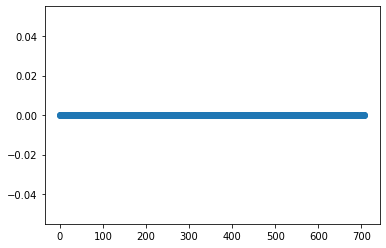

In [662]:
import matplotlib.pyplot as plt

X = np.linspace(0, len(desert)-1, len(desert))
plt.scatter(X, desert["offset"])

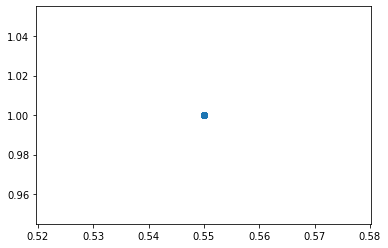

In [663]:
X = [t[0] for t in desert["temperature"]]
Y = [t[1] for t in desert["temperature"]]
plt.scatter(X, Y)